In [327]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [328]:
X, y = sklearn.datasets.make_classification(n_samples=5000, n_features=2, n_informative=2,
                                            n_redundant=0, n_repeated=0, n_classes=2,
                                            n_clusters_per_class=1,
                                            weights=[0.95, 0.05],
                                            class_sep=0.5, random_state=0)

dataset_df = pd.DataFrame({'X1':X[:,0],'X2':X[:,1], 'Y':y})
dataset_df.head()

,X1,X2,Y
0,-0.167337,0.081432,0
1,-0.023532,-0.527046,0
2,-0.577801,0.458236,0
3,0.343891,0.803027,0
4,-0.488292,0.675787,0


<Axes: xlabel='X1', ylabel='X2'>

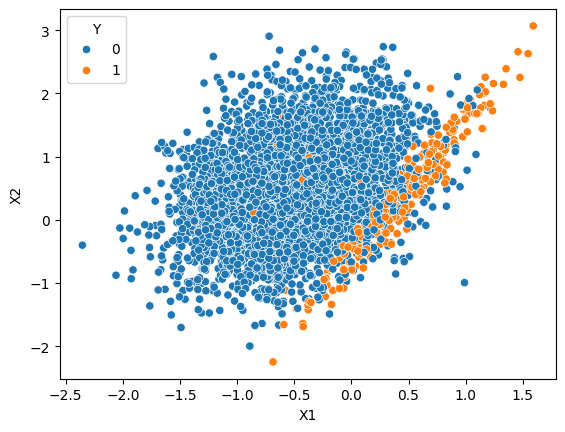

In [329]:
sns.scatterplot(data=dataset_df, x="X1", y="X2", hue="Y")

In [330]:
from sklearn.model_selection import train_test_split

X = dataset_df.drop('Y', axis=1)
y =  dataset_df[['Y']]

# Split dataset into training set and test set
X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(X, y, test_size=0.3, random_state=1)

In [331]:
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=4)
clf = clf.fit(X_train_original,y_train_original)
y_pred_original = clf.predict(X_test_original)

In [332]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",sklearn.metrics.f1_score(y_test_original, y_pred_original))

Accuracy: 0.4868421052631579


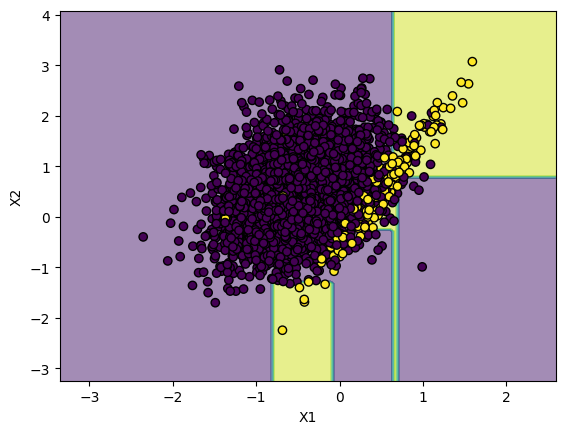

In [333]:
disp = DecisionBoundaryDisplay.from_estimator(
    clf, X_train_original, response_method='predict', 
    xlabel='X1', ylabel='X2', alpha=0.5
)
disp.ax_.scatter(X_train_original.X1, X_train_original.X2, c=y_train_original.Y, edgecolor="k")
plt.show()

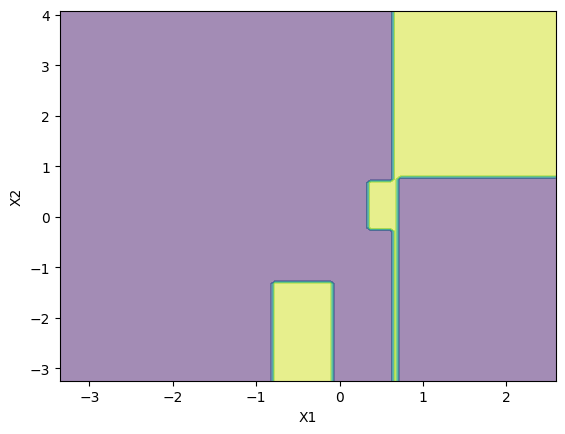

In [334]:
disp = DecisionBoundaryDisplay.from_estimator(
    clf, X_train_original, response_method='predict', 
    xlabel='X1', ylabel='X2', alpha=0.5
)
plt.show()

In [335]:
from sklearn.neighbors import NearestNeighbors

X = dataset_df.drop('Y', axis=1)
y =  dataset_df['Y']

knn = NearestNeighbors(n_neighbors=5, metric='euclidean')
knn.fit(X)

,n_neighbors,5
,radius,1.0
,algorithm,'auto'
,leaf_size,30
,metric,'euclidean'
,p,2
,metric_params,None
,n_jobs,None


In [336]:
class1_indices = dataset_df[dataset_df['Y'] == 1].index

distances, neighbor_indices = knn.kneighbors(X.loc[class1_indices])

In [337]:
indices_to_remove = set()

for i in range(len(neighbor_indices)):
    for neighbor_idx in neighbor_indices[i][1:]:
        if y.loc[neighbor_idx] == 0:
            indices_to_remove.add(neighbor_idx)

df_cleaned = dataset_df.drop(index=list(indices_to_remove))

<Axes: xlabel='X1', ylabel='X2'>

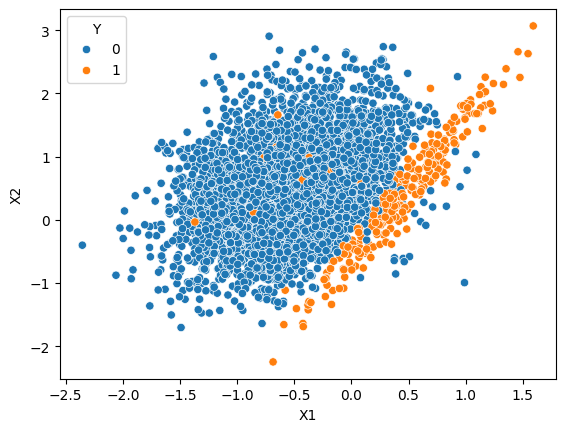

In [338]:
sns.scatterplot(data=df_cleaned, x="X1", y="X2", hue="Y")

In [339]:
from sklearn.model_selection import train_test_split

X = df_cleaned.drop('Y', axis=1)
y =  df_cleaned[['Y']]

# Split dataset into training set and test set
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X, y, test_size=0.3, random_state=1)

In [340]:
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=4)
clf = clf.fit(X_train_resampled,y_train_resampled)
y_pred_resampled = clf.predict(X_test_resampled)
y_pred_original = clf.predict(X_test_original)

In [341]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy Resampled:",sklearn.metrics.f1_score(y_test_resampled, y_pred_resampled))
print("Accuracy Original:",sklearn.metrics.f1_score(y_test_original, y_pred_original))

Accuracy Resampled: 0.6976744186046512
Accuracy Original: 0.632183908045977


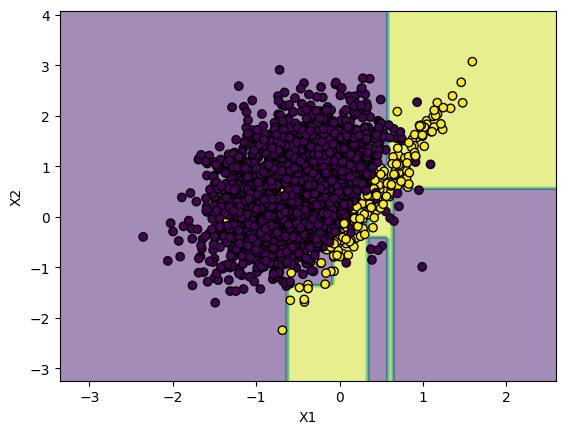

In [342]:
disp = DecisionBoundaryDisplay.from_estimator(
    clf, X_train_resampled, response_method='predict', 
    xlabel='X1', ylabel='X2', alpha=0.5
)
disp.ax_.scatter(X_train_resampled.X1, X_train_resampled.X2, c=y_train_resampled.Y, edgecolor="k")
plt.show()

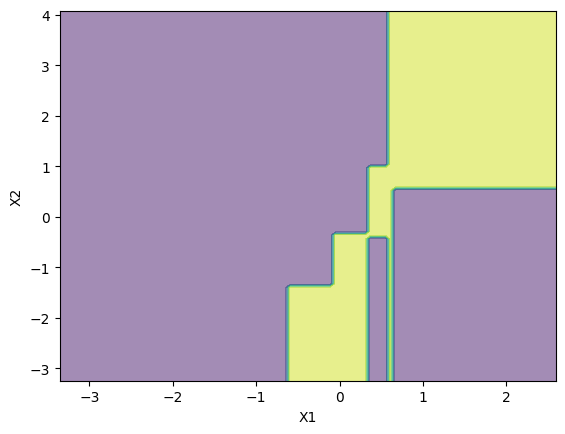

In [343]:
disp = DecisionBoundaryDisplay.from_estimator(
    clf, X_train_resampled, response_method='predict', 
    xlabel='X1', ylabel='X2', alpha=0.5
)
plt.show()

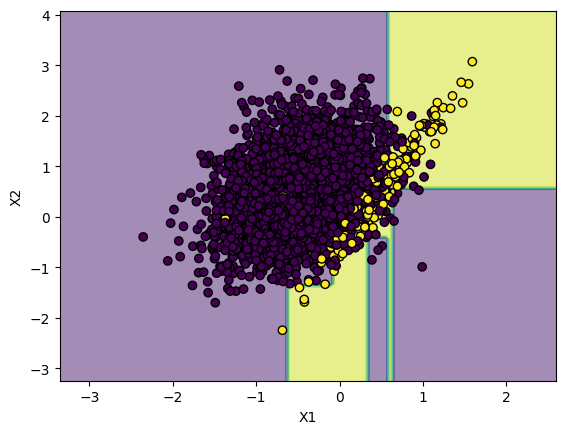

In [344]:
disp = DecisionBoundaryDisplay.from_estimator(
    clf, X_train_original, response_method='predict', 
    xlabel='X1', ylabel='X2', alpha=0.5
)
disp.ax_.scatter(X_train_original.X1, X_train_original.X2, c=y_train_original.Y, edgecolor="k")
plt.show()